In [1]:
import numpy as np
import glob
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io, filters, transform

SIZE = 128

In [2]:
train_img = []
train_label = [] 
for dir_path in glob.glob("Dataset/train/*"):
    label = dir_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
#         print(img_path)
        img = io.imread(img_path)
        img = transform.resize(img, (SIZE, SIZE), anti_aliasing=True)
        train_img.append(img)
        train_label.append(label)
        
train_img = np.array(train_img)
train_label = np.array(train_label)

with_mask
without_mask


In [3]:
test_img = []
test_label = [] 
for dir_path in glob.glob("Dataset/test/*"):
    label2 = dir_path.split("/")[-1]
    print(label2)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
#         print(img_path)
        img = io.imread(img_path)
        img = transform.resize(img, (SIZE, SIZE), anti_aliasing=True)
        test_img.append(img)
        test_label.append(label2)
        
test_img = np.array(test_img)
test_label = np.array(test_label)

with_mask
without_mask


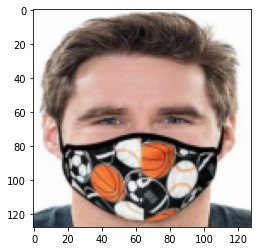

In [4]:
plt.imshow(train_img[0])

In [5]:
def feature_extractor(dataset):
    img_dataset = []
    for img in dataset:
        #Color
        b = img[:,:,0]
        b = b.flatten()
        g = img[:,:,1]
        g = b.flatten()
        r = img[:,:,2]
        r = b.flatten()
        
        color = np.concatenate((b, g, r), axis=0)
        
        
        
        # sobel
#         sobel = rgb_sobel_detection(img)
        
#         sobel_b = sobel[:,:,0]
#         sobel_b = sobel_b.flatten()
#         sobel_g = sobel[:,:,1]
#         sobel_g = sobel_g.flatten()
#         sobel_r = sobel[:,:,2]
#         sobel_r = sobel_r.flatten()
        
#         sobel_color = sobel_b + sobel_r + sobel_g
        
#         color = color + sobel_color
        
        img_dataset.append(color / 255)
        
    return np.array(img_dataset)

train_img = feature_extractor(train_img)
test_img = feature_extractor(test_img)

print(len(train_img[0]))

49152


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_label)
test_encoded = le.transform(test_label)
le.fit(train_label)
train_encoded = le.transform(train_label)

x_train, y_train, x_test, y_test = train_img, train_encoded, test_img, test_encoded

In [7]:
from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [8]:
test_prediction = SVM_model.predict(x_test)

In [9]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, test_prediction))

Accuracy =  0.9144736842105263


<AxesSubplot:>

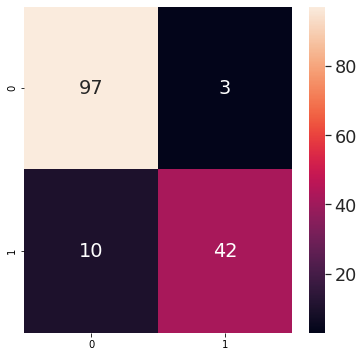

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)
